# Simple Analysis Distribution DSL1 and DSL2

In this notebook we are going to work from the source file 'json_nextflow_DSL.json' which is made in 'Form DSL1 Database' notebook, it is exactly the same file as in that directory, it is copied here just to simplify the code.

In this notebook are going to be presented different charts to study the evolution of DSL1 and DSL2 workflows.

__Reminder__ : Throughout the whole of this notebook, the estimations given are always an underestimation of the distribution of DSL1 workflows 

__IMPORTANT__ : There are repositories where they are neither written in DSL1 or DSL2. In these repositories, DSL1 is None, this is because there was no nextflow file found at their root.

In [1]:
import json
import pandas as pd
from datetime import datetime

Start by loading the json file

In [2]:
json_data={}
with open('json_nextflow_DSL.json') as json_file:
    #Read the file
    json_data = json.load(json_file)

We transform the dictionnary to a dataframe and add an extarct colum to be able to produce the graphs in a simpler way 

In [3]:
data_frame= pd.DataFrame.from_dict(json_data).T
data_frame['DSL2'] = data_frame.DSL1 == False

Auxilary functions

In [5]:

def to_date_year(x):
	return datetime.strptime(x, '%Y-%m-%d').year

def to_date_month(x):
	return datetime.strptime(x[:-3], '%Y-%m')

def to_int(x):
    if(isinstance(x, bool)):
        return int(x)
    else:
        return 0

## Number of workflows per DSL

Total :   1789
DSL1 :    1068
DSL2 :    551
Unknown : 170


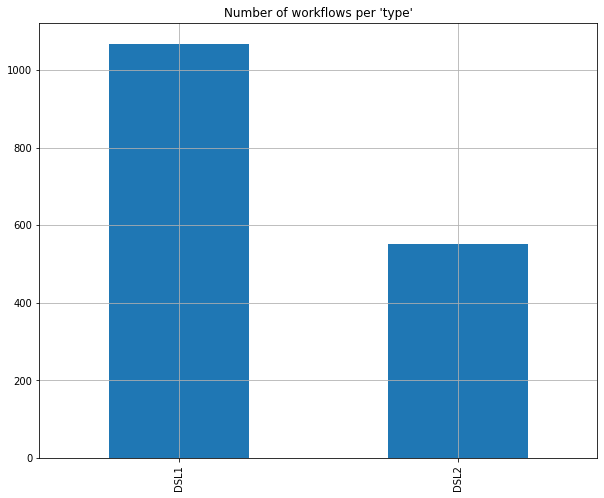

In [6]:
data= data_frame.copy()
print('Total :  ', len(data))
data['DSL2'] = data['DSL2'].apply(to_int)
data['DSL1'] = data['DSL1'].apply(to_int)

df_gb = data[['DSL1', 'DSL2']]
df_gb.sum()
df_gb.sum().plot(title="Number of workflows per 'type'",kind="bar", figsize=(10, 8), grid=True)
print('DSL1 :   ', df_gb['DSL1'].sum())
print('DSL2 :   ', df_gb['DSL2'].sum())
print('Unknown :', len(data) - df_gb['DSL2'].sum() -df_gb['DSL1'].sum())


<AxesSubplot:title={'center':'Percentage of workflows per version of Nextflow'}, ylabel='None'>

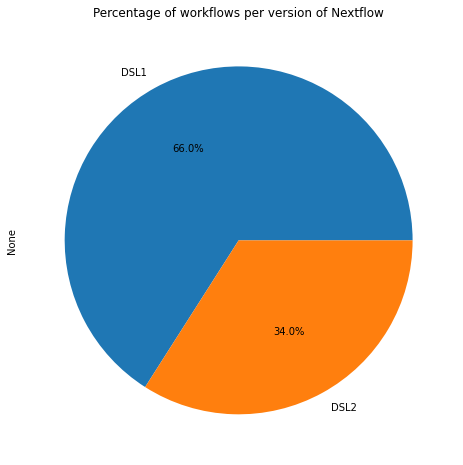

In [7]:
data= data_frame.copy()
data['DSL2'] = data['DSL2'].apply(to_int)
data['DSL1'] = data['DSL1'].apply(to_int)

df_gb = data[['DSL1', 'DSL2']]
df_gb.sum()
df_gb.sum().plot(title="Percentage of workflows per version of Nextflow",kind="pie", figsize=(10, 8), grid=True, autopct='%1.1f%%')


## Number of workflows created per year

<AxesSubplot:title={'center':'Number of workflows created per year'}, xlabel='creation_date'>

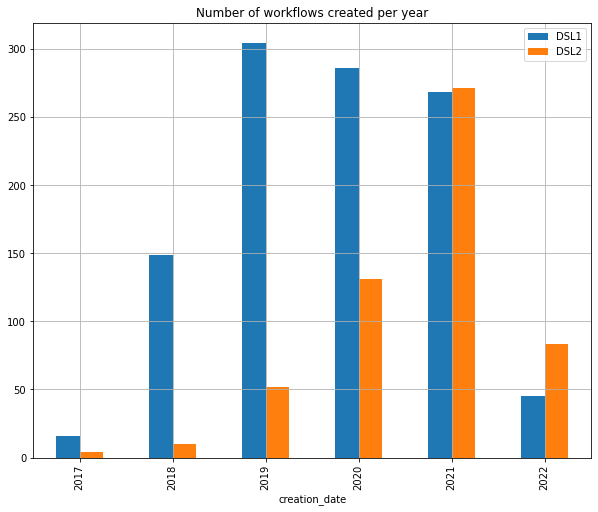

In [8]:
data= data_frame.copy()
data['creation_date'] = data['creation_date'].apply(to_date_year)
data['DSL2'] = data['DSL2'].apply(to_int)
data['DSL1'] = data['DSL1'].apply(to_int)


temp= data[['creation_date', 'DSL2', 'DSL1']]
df_gb = temp[['DSL1', 'DSL2']].groupby([temp['creation_date']])

df_gb.sum().plot(title="Number of workflows created per year",kind="bar", figsize=(10, 8), grid=True)


<AxesSubplot:title={'center':'Number of workflows'}, xlabel='creation_date'>

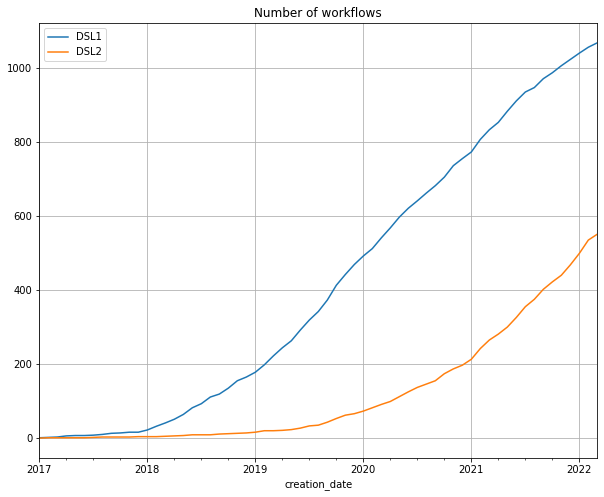

In [9]:
data= data_frame.copy()
data['creation_date'] = data['creation_date'].apply(to_date_month)
data['DSL2'] = data['DSL2'].apply(to_int)
data['DSL1'] = data['DSL1'].apply(to_int)

df_gb = data[['DSL1','DSL2']].groupby([data['creation_date']])

df_gb.sum().cumsum().plot(title="Number of workflows",kind="line", figsize=(10, 8), grid=True)

## Number of workflows created per year (Snakemake + Nextflow)

In [38]:
json_data={}
with open('json_snakemake.json') as json_file:
    #Read the file
    json_data = json.load(json_file)
    #Remove the last_date which is used to restart the crawler at the last date
    json_data.pop('last_date', None)

data_frame_snake = pd.DataFrame.from_dict(json_data).T
data_frame_snake['snakemake'] =  True

<AxesSubplot:title={'center':'Number of workflows created per year'}, xlabel='creation_date'>

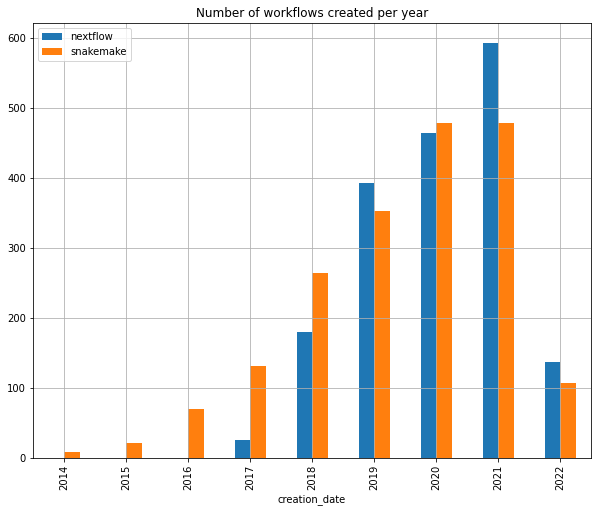

In [45]:
data= data_frame.copy()
data['nextflow'] =  True
data = pd.concat([data_frame_snake, data])
data['creation_date'] = data['creation_date'].apply(to_date_year)
data['nextflow'] = data['nextflow'].apply(to_int)
data['snakemake'] = data['snakemake'].apply(to_int)

temp= data[['creation_date', 'nextflow', 'snakemake']]
df_gb = temp[['nextflow', 'snakemake']].groupby([temp['creation_date']])

df_gb.sum().plot(title="Number of workflows created per year", kind="bar", figsize=(10, 8), grid=True)
